In [34]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Dense, Flatten, LSTM, Lambda
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [17]:
_SEED = 1234

_PATH_BASE = os.path.join(os.getcwd(), 'data')

MAX_EPOCHS = 10

In [3]:
X_data = np.load(os.path.join(_PATH_BASE, 'b_daily_feature.npy'))
y_data = np.load(os.path.join(_PATH_BASE, 'b_daily_label.npy'))

In [6]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_data, y_data, test_size=0.2, random_state=_SEED)

#### CNN

In [22]:
model_cnn = tf.keras.Sequential([
    Conv1D(256, 3, activation='relu', input_shape=X_train.shape[1:]), 
    Conv1D(128, 3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [24]:
model_cnn.fit(
    X_train, y_train,
    epochs=MAX_EPOCHS,
    validation_split=0.2,
    # callbacks=[early_stopping]
)

Epoch 1/10


19/19 [==============================] - 2s 19ms/step - loss: 1.0151 - mean_absolute_error: 0.7309 - val_loss: 0.7917 - val_mean_absolute_error: 0.6415
Epoch 2/10
19/19 [==============================] - 0s 13ms/step - loss: 0.7300 - mean_absolute_error: 0.6091 - val_loss: 0.8190 - val_mean_absolute_error: 0.5815
Epoch 3/10
19/19 [==============================] - 0s 13ms/step - loss: 0.5869 - mean_absolute_error: 0.5338 - val_loss: 0.8776 - val_mean_absolute_error: 0.6382
Epoch 4/10
19/19 [==============================] - 0s 13ms/step - loss: 0.5082 - mean_absolute_error: 0.4952 - val_loss: 0.7941 - val_mean_absolute_error: 0.6028
Epoch 5/10
19/19 [==============================] - 0s 13ms/step - loss: 0.4033 - mean_absolute_error: 0.4378 - val_loss: 0.9149 - val_mean_absolute_error: 0.6771
Epoch 6/10
19/19 [==============================] - 0s 13ms/step - loss: 0.3552 - mean_absolute_error: 0.4127 - val_loss: 0.7833 - val_mean_absolute_error: 0.6247
Epoch 7/10
19/19 [===============

In [26]:
pred_cnn = model_cnn.predict(X_test).reshape(-1)

6/6 [==============================] - 0s 2ms/step


In [27]:
pred_cnn_train = model_cnn.predict(X_train).reshape(-1)

24/24 [==============================] - 0s 4ms/step


In [28]:
model_lstm = tf.keras.Sequential([
    LSTM(32, return_sequences=False),
    Dense(1)
])
model_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [31]:
model_lstm.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.6652 - mean_absolute_error: 0.5700
Epoch 2/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.6481 - mean_absolute_error: 0.5483
Epoch 3/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.6360 - mean_absolute_error: 0.5421
Epoch 4/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.6287 - mean_absolute_error: 0.5507
Epoch 5/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.6194 - mean_absolute_error: 0.5517
Epoch 6/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.6042 - mean_absolute_error: 0.5200
Epoch 7/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.5894 - mean_absolute_error: 0.5242
Epoch 8/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.5861 - mean_absolute_error: 0.5346
Epoch 9/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.5659 - mean_absolute_error: 0.5082


In [32]:
pred_lstm = model_lstm.predict(X_test).reshape(-1)

6/6 [==============================] - 0s 3ms/step


In [33]:
pred_lstm_t = model_lstm.predict(X_train).reshape(-1)

24/24 [==============================] - 0s 3ms/step


In [37]:
len(y_test)

185

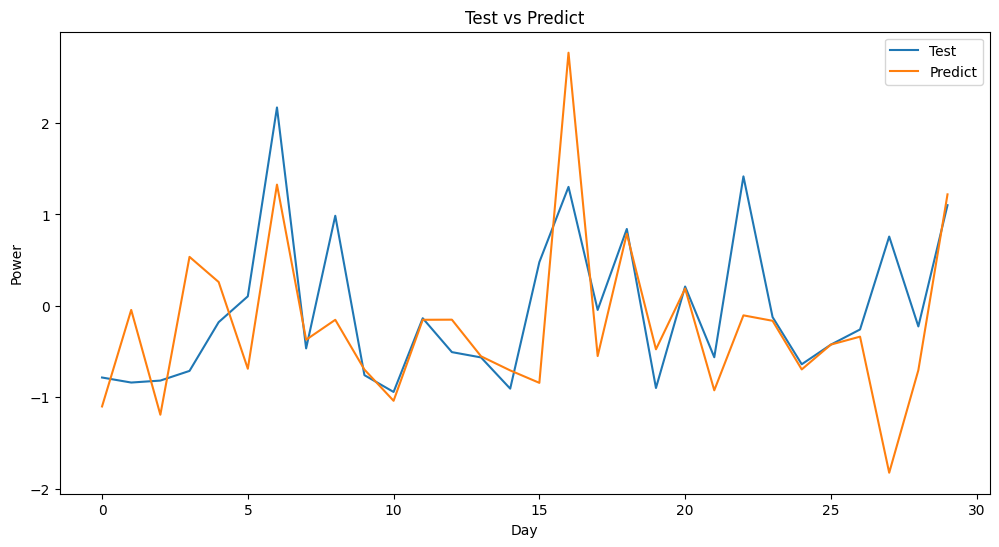

In [40]:
plt.figure(figsize=(12,6))
plt_size = 30

plt.plot(
    np.arange(len(y_test))[:plt_size], 
    y_test[:plt_size],
    label='Test'
)
plt.plot(
    np.arange(len(y_test))[:plt_size], 
    pred_lstm[:plt_size],
    label='Predict'
)
plt.xlabel('Day')
plt.ylabel('Power')
plt.title('Test vs Predict')
plt.legend()
plt.show()